# Regresión Logística 


<a id="intro"></a>
## Introducción
"El estudio Framingham es un estudio de cohorte observacional basado en la población que fue iniciado por el Servicio de Salud Pública de los Estados Unidos en 1948 para investigar prospectivamente la epidemiología y los factores de riesgo de las enfermedades cardiovasculares. Se ha convertido en un estudio longitudinal en curso que recopila datos prospectivos sobre una amplia variedad de factores de riesgo biológicos y de estilo de vida y sobre los resultados de enfermedades cardiovasculares, neurológicas y de otro tipo en 3 generaciones de participantes. Si bien inicialmente se centró en la evaluación clínica de los factores de riesgo y la enfermedad, el estudio ha evolucionado, incorporando avances en la ciencia médica (criterios de diagnóstico más nuevos, ensayos de biomarcadores y tecnologías de imágenes) a medida que estos estuvieron disponibles. Se dispone de amplios datos de genotipado de más del 60% de todos los participantes (incluido más del 90% de las personas que asistieron a los exámenes después de 1990) y se han almacenado muestras de suero y plasma de exámenes sucesivos para estudios futuros.

El estudio comenzó en 1948-50 con el reclutamiento de la cohorte Original (5209 participantes; 2873 mujeres, 2336 hombres; edad 28-62 años, edad promedio 45 años) que comprendía dos tercios de la población adulta que entonces residía en la ciudad de Framingham. , MA. Estas personas han sido evaluadas cada dos años y actualmente se encuentran en el 29º examen bienal. En 1971, los hijos de los miembros de la cohorte Original y sus cónyuges se reunieron en la cohorte de Hijos (5124 personas, 2641 mujeres, 2483 hombres; edad de 5 a 70 años, edad media de 37 años; 3514 descendientes biológicos). Los miembros de esta cohorte han sido reevaluados 7 veces. A partir de 002, se reclutó una tercera generación y esta cohorte Gen 3 comprende 4095 personas (2183 mujeres, 1912 hombres; edad media 40 años) que se han sometido a un examen inicial. En cada examen del estudio, los participantes son evaluados con historiales médicos, exámenes médicos, pruebas de laboratorio para factores de riesgo vascular y, en algunos exámenes, con baterías de pruebas cognitivas e imágenes cerebrales."

Fuente: www.bmc.org
Sitio web oficial: https://framinghamheartstudy.org/.
El dataset puede ser descargado: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

<a id="pred"></a>
## Predicción de enfermedades cardíacas
Se trabajara con una porcion del dataset del estudio. Con la idea de desarrollar un modelo de regresion logistica capaz de identificar pacientes con alto riesgo de enfermedades coronarias en el mediano plazo. 


<a id="descripcion"></a>
### Descripción del dataset
El dataset cuenta con las siguientes variables:
- age: Edad.
- male: Género.
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker: Si la persona fuma o no
- cigsPerDay: la cantidad de cigarrillos que la persona fuma por día en promedio.
- BPMeds: si la persona consume medicación para la presión sanguínea.
- prevalentStroke: Si la persona tuvo un infarto anteriormente.
- prevalentHyp: si la persona tiene hipertensión.
- diabetes: si la persona tuvo diabetes.
- totChol: nivel de colesterol total.
- sysBP: presión sanguínea sistólica.
- diaBP:: presión sanguínea diastólica.
- BMI: índice de masa corporal.
- heartRate: frecuencia cardíaca.
- glucose: nivel de glucosa en sangre.
- TenYearCHD: si la persona está en riesgo de tener una enfermedad coronaria dentro de los próximos 10 años.



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/framingham.csv')
df.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3830,1,62,1.0,0,0.0,0.0,0,0,0,252.0,156.5,93.0,28.65,88.0,97.0,1
2913,0,42,2.0,0,0.0,0.0,0,0,0,183.0,120.0,76.0,21.12,100.0,72.0,0
2006,1,36,4.0,1,35.0,0.0,0,0,0,240.0,114.0,76.0,25.82,66.0,NaN,0
2815,1,48,2.0,1,20.0,0.0,0,0,0,194.0,102.5,69.0,18.55,79.0,83.0,0
344,0,63,1.0,1,20.0,0.0,0,0,0,238.0,136.0,66.0,20.20,60.0,92.0,1
1702,0,47,3.0,1,3.0,0.0,0,0,0,246.0,120.0,78.0,24.71,63.0,75.0,0
3449,0,56,1.0,1,10.0,1.0,0,1,1,241.0,174.0,97.0,29.22,90.0,135.0,1
3643,0,36,3.0,0,0.0,0.0,0,0,0,188.0,112.0,78.0,22.54,63.0,73.0,0
1898,1,63,2.0,1,43.0,0.0,0,0,0,230.0,127.0,82.0,19.97,70.0,67.0,0
377,1,67,1.0,0,0.0,0.0,0,0,0,203.0,122.0,74.0,15.54,96.0,79.0,0


In [3]:
df.shape

(4240, 16)

In [4]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.isna().any(axis=1).sum()

582

Hay 4240 registros de los cuales 582 tienen valores faltantes (13% del total)

In [6]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

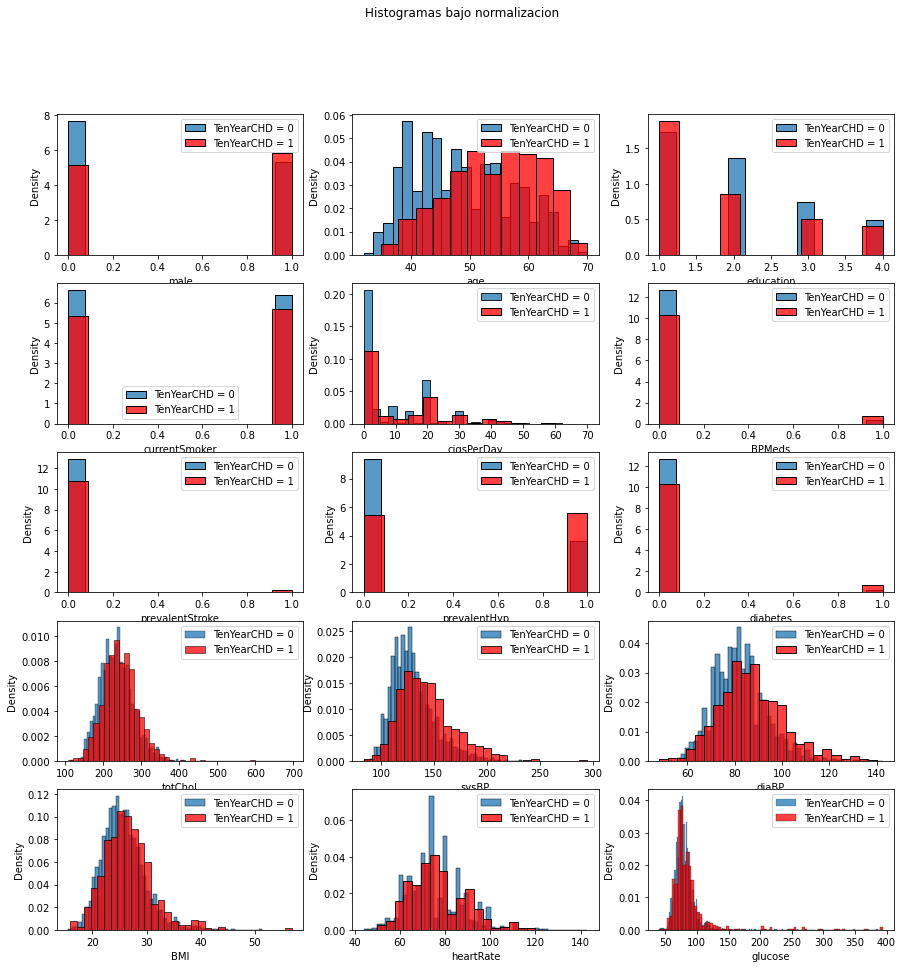

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.suptitle('Histogramas bajo normalizacion')
for c, ax in zip(df.columns[:-1], axes.flatten()):
    sns.histplot(data = df.loc[df['TenYearCHD']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = df.loc[df['TenYearCHD']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'red')
    ax.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])

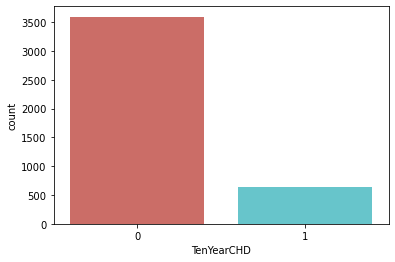

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x='TenYearCHD',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

<AxesSubplot:>

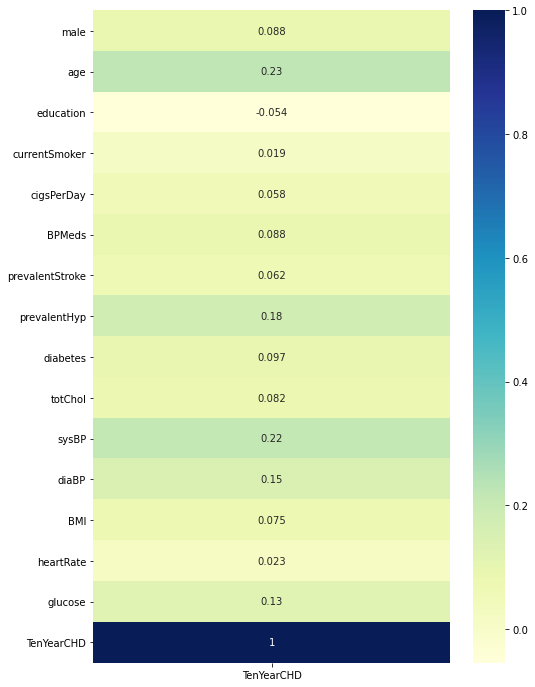

In [11]:
plt.figure(figsize=(8,12))
sns.heatmap(df.corr()[['TenYearCHD']], annot=True,cmap="YlGnBu")

<a id="clf"></a>
### Clasificación de pacientes
Para etiquetar a aquellas que tengan riesgo de padecer una enfermedad coronaria en los próximos 10 años.


In [12]:
df.dropna(inplace=True)

In [13]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [15]:
y_train.mean(), y_test.mean()

(0.15238789646372586, 0.15191256830601094)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

<a id="fit"></a>
#### Fit del modelo

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

<a id="eval"></a>
#### Evaluación del modelo


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
accuracy_score(y_train, lr.predict(X_train_std))

0.8541742617572001

Text(33.0, 0.5, 'Reales')

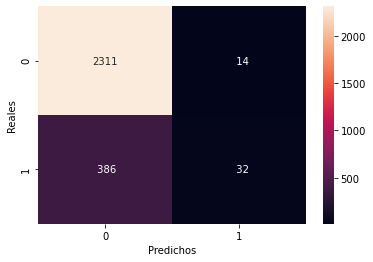

In [20]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Observamos que hay una accuracy del 85%, pero que de los 418 casos positivos, sólo 32 (7.6%) están siendo detectados. Esto implica que nuestro clasificador le está diciendo a mucha gente que está fuera de peligro cuando en realidad no es así. Intentemos modificar el modelo para mejorar la predicción en estos casos

<a id="opt"></a>
#### Optimización del modelo

In [21]:
lr.predict_proba(X_train_std[y_train==0])[:,1]

array([0.13013765, 0.0262662 , 0.03492299, ..., 0.05835754, 0.24522372,
       0.17347683])

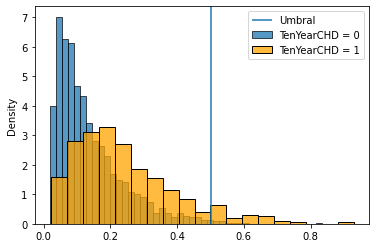

In [22]:
# Histograma de probabilidades
sns.histplot(data = lr.predict_proba(X_train_std[y_train==0])[:,1], stat = 'density')
sns.histplot(data = lr.predict_proba(X_train_std[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

Dada la naturaleza del probelma, conviene utilizar una estrategia que impida clasificar como pacientes sanos a aquellos que están en riesgo.

In [23]:
umbral = 0.2
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train = probs > umbral

In [24]:
accuracy_score(y_train, y_pred_train)

0.7542836310608823

Text(33.0, 0.5, 'Reales')

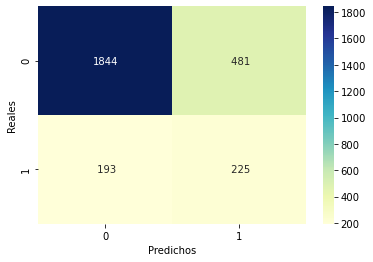

In [27]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d',cmap="YlGnBu")
plt.xlabel('Predichos')
plt.ylabel('Reales')

Modificando el umbral de decisión, baja considerablemente la exactitud del modelo, pero ahora detecta correctamente 225 (53.8%) de los casos positivos 